In [2]:

import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,GRU

import matplotlib.pyplot as plt

# Load data
start = '25/05/2022'
end = dt.datetime.now().strftime("%d/%m/%Y")

company = 'DOW'
df = pd.read_csv('./DowJones.csv')

df = pd.DataFrame(df)
df


,Date,Close,Open,High,Low,Volume,Change
0,26/05/2022,32638.44,32263.33,32773.26,32263.33,33895000000,0.02
1,25/05/2022,32121.53,31816.31,32254.29,31754.33,33313000000,0.01
2,24/05/2022,31931.06,31717.61,32014.86,31367.33,37385000000,0.00
3,23/05/2022,31880.64,31497.56,31968.42,31484.02,38926000000,0.02
4,20/05/2022,31260.58,31426.94,31514.07,30635.76,47903000000,0.00
...,...,...,...,...,...,...,...
1024,3/5/2018,23930.15,23836.23,23996.15,23531.31,38924000000,0.00
1025,2/5/2018,23924.98,24097.63,24185.52,23886.30,38535000000,-0.01
1026,1/5/2018,24099.05,24117.29,24117.29,23808.19,38007000000,0.00
1027,30/04/2018,24163.15,24410.41,24498.23,24163.08,41665000000,-0.01


In [3]:

df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
ma_1 = 7
ma_2 = 14
ma_3 = 21
# Đường Simple Moving Average (SMA)
# là đường trung bình động đơn giản được tính bằng trung bình cộng các mức giá đóng cửa trong một khoảng thời gian giao dịch nhất định.
# Vd MA_7 = Khoảng thời gian (7 ngày về sau tính cả ngày đang tính)
df[f'SMA_{ma_1}'] = df['Close'].rolling(window=ma_1).mean()
df[f'SMA_{ma_2}'] = df['Close'].rolling(window=ma_2).mean()
df[f'SMA_{ma_3}'] = df['Close'].rolling(window=ma_3).mean()

df[f'SD_{ma_1}'] = df['Close'].rolling(window=ma_1).std()
df[f'SD_{ma_3}'] = df['Close'].rolling(window=ma_3).std()
df.dropna(inplace=True)

df.to_csv(f"{company}.csv")
print("Done Loading Data")


Done Loading Data


In [4]:
# Process Data
pre_day = 30
scala_x = MinMaxScaler(feature_range=(0, 1))
scala_y = MinMaxScaler(feature_range=(0, 1))
cols_x = ['H-L', 'O-C', f'SMA_{ma_1}', f'SMA_{ma_2}', f'SMA_{ma_3}', f'SD_{ma_1}', f'SD_{ma_3}']
cols_y = ['Close']
# 7 giá trị của côt x sẽ để dự đoán cho Close của ngày thứ i
scaled_data_x = scala_x.fit_transform(df[cols_x].values.reshape(-1, len(cols_x)))
scaled_data_y = scala_y.fit_transform(df[cols_y].values.reshape(-1, len(cols_y)))
# scaled_data_x
scaled_data_y

array([[0.84164629],
       [0.80789907],
       [0.80450765],
       ...,
       [0.30246071],
       [0.3059812 ],
       [0.31411182]])

In [5]:
x_total = []
y_total = []

for i in range(pre_day, len(df)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])
x_total
y_total

[array([0.84970386]),
 array([0.82121265]),
 array([0.78830902]),
 array([0.78825136]),
 array([0.80087677]),
 array([0.80703789]),
 array([0.77114048]),
 array([0.78128673]),
 array([0.82508244]),
 array([0.83496067]),
 array([0.84027105]),
 array([0.80751571]),
 array([0.8403397]),
 array([0.84946495]),
 array([0.80360968]),
 array([0.79855303]),
 array([0.82408341]),
 array([0.850587]),
 array([0.86337554]),
 array([0.89755005]),
 array([0.90054713]),
 array([0.87733335]),
 array([0.88677385]),
 array([0.91442861]),
 array([0.94334326]),
 array([0.92657675]),
 array([0.90616508]),
 array([0.90608874]),
 array([0.90726516]),
 array([0.93572397]),
 array([0.92341655]),
 array([0.90840204]),
 array([0.88608239]),
 array([0.85506862]),
 array([0.8554701]),
 array([0.86259015]),
 array([0.86625728]),
 array([0.86081289]),
 array([0.88552878]),
 array([0.90273357]),
 array([0.92139708]),
 array([0.95123827]),
 array([0.96232203]),
 array([0.9720267]),
 array([0.9699232]),
 array([0.959864

In [ ]:




test_size = 200

x_train = np.array(x_total[:len(x_total)-test_size])
x_test = np.array(x_total[len(x_total)-test_size:])
y_train = np.array(y_total[:len(y_total)-test_size])
y_test = np.array(y_total[len(y_total)-test_size:])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Build Model
model = Sequential()

model.add(GRU(units=60, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=len(cols_y)))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=60, steps_per_epoch=40, use_multiprocessing=True)
model.save(f"{company}.h5")
print("Done Training Model")



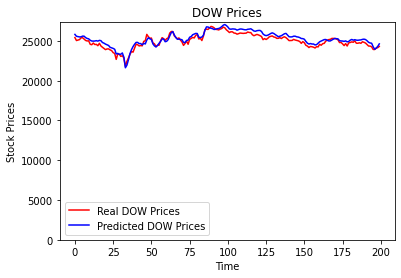

[[24866.225]]


In [14]:
# Testing
from tensorflow import keras
model = keras.models.load_model('DOW.h5')
predict_prices = model.predict(x_test)
predict_prices = scala_y.inverse_transform(predict_prices)
# trả về giá thực không còn scale nữa

# Ploting the Stat
real_price = df[len(df)-test_size:]['Close'].values.reshape(-1, 1)
real_price = np.array(real_price)
real_price = real_price.reshape(real_price.shape[0], 1)

plt.plot(real_price, color="red", label=f"Real {company} Prices")
plt.plot(predict_prices, color="blue", label=f"Predicted {company} Prices")
plt.title(f"{company} Prices")
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.ylim(bottom=0)
plt.legend()
plt.savefig("result.png")
plt.show()
plt.close()

# Make Prediction
x_predict = df[len(df)-pre_day:][cols_x].values.reshape(-1, len(cols_x))
x_predict = scala_x.transform(x_predict)
x_predict = np.array(x_predict)
x_predict = x_predict.reshape(1, x_predict.shape[0], len(cols_x))
prediction = model.predict(x_predict)
prediction = scala_y.inverse_transform(prediction)
print(prediction)

